In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import joblib
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [227]:
df=pd.read_csv("Tunnelling_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

C:\Users\SHREEHARI\AppData\Local\Temp\ipykernel_15612\1900165954.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv("Tunnelling_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)


In [228]:
df=df.drop(3,axis=1)

In [229]:
df=df.rename(columns={0:"Timestamp",1:"Protocol",2:"Source_IP",4:"Destination_IP",5:"Identification_no",6:"DNS_type",7:"DNS_info",8:"DNS_Response_Len"})

In [230]:
df.insert(8,"Lable","Tunnel",True)

In [231]:
df.DNS_type.unique()

array(['CNAME?', 'CNAME', 'PTR?', 'NXDomain', 'TXT?', 'TXT', 'PTR', 'MX?',
       'A?', 'AAAA?', nan], dtype=object)

In [232]:
df.DNS_info.unique()

array(['dnscat.60d201f876f3ac26f0d131003afbac0ee3.',
       'dnscat.acb201f876cc2d09230bd1ffff199bc5d2.',
       '13.3.168.192.in-addr.arpa.', ...,
       'f76901caff46d4a045bb900120859005b2.chalu.com.',
       'f56501caffb73919a61c30ffffd1f93552',
       'f93101caff39da0f3fe40601192ea2a545.chalu.com.'], dtype=object)

In [233]:
df.Lable.unique()

array(['Tunnel'], dtype=object)

In [234]:
df.DNS_Response_Len.unique()

array(['(59)', '(114)', '(43)', '(44)', '(106)', '(38)', '(62)', '(47)',
       '(307)', '(310)', nan, '(152)', '(142)', '(297)', '(238)', '(109)',
       '(120)', '(271)', '(255)', '(313)', '(215)', '(273)', '(78)',
       '(264)', '(125)', '(144)', '(32)'], dtype=object)

In [235]:
df

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,18:58:15.801177,IP,192.168.3.146.51531,192.168.3.14.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,(59),Tunnel
1,18:58:15.802048,IP,192.168.3.14.domain,192.168.3.146.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,(114),Tunnel
2,18:58:16.197885,IP,192.168.3.14.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,(43),Tunnel
3,18:58:16.210500,IP,dns.google.domain,192.168.3.14.39576:,21832,NXDomain,0/0/0,(43),Tunnel
4,18:58:16.210722,IP,192.168.3.14.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,(44),Tunnel
...,...,...,...,...,...,...,...,...,...
12060,19:24:19.917524,IP,192.168.3.146.55198,192.168.3.14.domain:,1576+,TXT?,fb2f01caff1cd77d86273d011fa86acf54.chalu.com.,(62),Tunnel
12061,19:24:19.918503,IP,192.168.3.14.domain,192.168.3.146.55198:,1576,TXT,9aeb01caffc7b2bf4641b8ffffd1f93552,(109),Tunnel
12062,19:24:20.922298,IP,192.168.3.146.55198,192.168.3.14.domain:,24481+,MX?,f76901caff46d4a045bb900120859005b2.chalu.com.,(62),Tunnel
12063,19:24:12.883130,IP,192.168.3.14.domain,192.168.3.146.55198:,41349,TXT,f56501caffb73919a61c30ffffd1f93552,(109),Tunnel


In [237]:
df[df.isnull().any(axis=1)]

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
9613,"'A?',","'AAAA?',","'MX'],",10,(309),NaN,NaN,NaN,Tunnel


In [238]:
df=df.drop(9613)

In [239]:
df

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,18:58:15.801177,IP,192.168.3.146.51531,192.168.3.14.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,(59),Tunnel
1,18:58:15.802048,IP,192.168.3.14.domain,192.168.3.146.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,(114),Tunnel
2,18:58:16.197885,IP,192.168.3.14.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,(43),Tunnel
3,18:58:16.210500,IP,dns.google.domain,192.168.3.14.39576:,21832,NXDomain,0/0/0,(43),Tunnel
4,18:58:16.210722,IP,192.168.3.14.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,(44),Tunnel
...,...,...,...,...,...,...,...,...,...
12060,19:24:19.917524,IP,192.168.3.146.55198,192.168.3.14.domain:,1576+,TXT?,fb2f01caff1cd77d86273d011fa86acf54.chalu.com.,(62),Tunnel
12061,19:24:19.918503,IP,192.168.3.14.domain,192.168.3.146.55198:,1576,TXT,9aeb01caffc7b2bf4641b8ffffd1f93552,(109),Tunnel
12062,19:24:20.922298,IP,192.168.3.146.55198,192.168.3.14.domain:,24481+,MX?,f76901caff46d4a045bb900120859005b2.chalu.com.,(62),Tunnel
12063,19:24:12.883130,IP,192.168.3.14.domain,192.168.3.146.55198:,41349,TXT,f56501caffb73919a61c30ffffd1f93552,(109),Tunnel


In [240]:
df[df.isnull().any(axis=1)]

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable


In [241]:
df['DNS_Response_Len'] = df['DNS_Response_Len'].str.extract(r'\((\d+)\)').astype(int)

In [242]:
values_to_drop = ['NXDomain']
df = df[~df['DNS_type'].isin(values_to_drop)]

In [243]:
for i  in df.columns:
    print(i,df[i].unique())
    print("")

Timestamp ['18:58:15.801177' '18:58:15.802048' '18:58:16.197885' ...
 '19:24:20.922298' '19:24:12.883130' '19:24:13.887213']

Protocol ['IP']

Source_IP ['192.168.3.146.51531' '192.168.3.14.domain' '192.168.3.14.39576'
 '192.168.3.14.34517' '192.168.3.14.33344' 'dns.google.domain'
 '192.168.3.14.36996' '192.168.3.14.58351' '192.168.3.14.38728'
 '192.168.3.14.37652' '192.168.3.14.50051' '192.168.3.14.56505'
 '192.168.3.14.42041' '192.168.3.14.52168' '192.168.3.14.34493'
 '192.168.3.14.48307' '192.168.3.14.52976' '192.168.3.14.38087'
 '192.168.3.14.46666' '192.168.3.146.55198' '192.168.3.14.44616'
 '192.168.3.14.35040' '192.168.3.14.41807' '192.168.3.14.45445'
 '192.168.3.14.57502' '192.168.3.14.48921' '192.168.3.14.50257'
 '192.168.3.14.49528']

Destination_IP ['192.168.3.14.domain:' '192.168.3.146.51531:' 'dns.google.domain:'
 '192.168.3.14.33344:' '192.168.3.146.55198:' '192.168.3.14.41807:']

Identification_no ['45828+' '45828' '21832+' ... '24481+' '41349' '27462+']

DNS_type ['CNAM

In [244]:
df.shape

(12060, 9)

In [246]:
df1=pd.read_csv("Legitimate_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

C:\Users\SHREEHARI\AppData\Local\Temp\ipykernel_15612\1346966191.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1=pd.read_csv("Legitimate_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)


In [247]:
df1=df1.drop(3,axis=1)

In [248]:
df1=df1.rename(columns={0:"Timestamp",1:"Protocol",2:"Source_IP",4:"Destination_IP",5:"Identification_no",6:"DNS_type",7:"DNS_info",8:"DNS_Response_Len"})

In [249]:
df1.insert(8,"Lable","Normal",True)

In [250]:
df1.shape

(48474, 9)

In [252]:
df1[df1.isnull().any(axis=1)]

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
14,15:13:39.217406,IP,dns.google.domain,192.168.86.207.48148:,29452,0/1/0,(94),NaN,Normal
22,15:13:39.899945,IP,dns.google.domain,192.168.86.207.49334:,14055,0/1/0,(86),NaN,Normal
37,15:13:41.355336,IP,dns.google.domain,192.168.86.207.40021:,58912,0/1/0,(97),NaN,Normal
41,15:13:41.471425,IP,dns.google.domain,192.168.86.207.51119:,44134,0/1/0,(87),NaN,Normal
49,15:13:41.901447,IP,dns.google.domain,192.168.86.207.53811:,65368,0/1/0,(82),NaN,Normal
...,...,...,...,...,...,...,...,...,...
48451,17:31:03.676338,IP,192.168.3.132.50917,239.255.255.250.1900:,"UDP,",length,173,NaN,Normal
48452,17:31:03.690746,IP,dns.google.domain,192.168.3.13.59364:,42217,0/1/0,(114),NaN,Normal
48457,17:31:03.824816,IP,dns.google.domain,192.168.3.13.41600:,26612,0/1/0,(94),NaN,Normal
48464,17:31:04.527267,IP,dns.google.domain,192.168.3.13.35508:,30501,0/1/0,(119),NaN,Normal


In [253]:
df1.dropna(inplace=True)

In [254]:
df1.shape

(33600, 9)

In [255]:
df1

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,15:13:36.199943,IP,192.168.86.207.47531,dns.google.domain:,2966+,A?,connectivity-check.ubuntu.com.,(47),Normal
1,15:13:36.199974,IP,192.168.86.207.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,(47),Normal
2,15:13:36.642533,IP,192.168.86.207.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,(38),Normal
3,15:13:36.708398,IP,192.168.86.207.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,(45),Normal
4,15:13:36.758224,IP,dns.google.domain,192.168.86.207.47035:,16199,NXDomain,0/0/0,(45),Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,(57),Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,(39),Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,(39),Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,(35),Normal


In [256]:
df1.DNS_Response_Len.isnull().sum()

0

In [257]:
df1.duplicated().sum()

0

In [258]:
df1.Protocol.unique()

array(['IP', 'ARP,'], dtype=object)

In [259]:
for i in df1.columns:
    print(i,df1[i].unique()) 
    print("")


Timestamp ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protocol ['IP' 'ARP,']

Source_IP ['192.168.86.207.47531' '192.168.86.207.50269' '192.168.86.207.47035' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Destination_IP ['dns.google.domain:' '192.168.86.207.47035:' '192.168.86.207.48657:'
 '192.168.86.89' '192.168.86.207' '192.168.86.207.52624:'
 '192.168.86.207.53632:' '192.168.86.207.32883:' '192.168.86.207.40465:'
 '192.168.86.207.42238:' '192.168.86.207.38471:' '192.168.86.207.42268:'
 '192.168.86.207.bootpc:' '192.168.86.207.43281:' '192.168.86.207.36582:'
 '192.168.86.207.47320:' '192.168.86.207.39378:' '192.168.86.207.34127:'
 '192.168.86.207.44441:' 'alphyn.canonical.com.ntp:'
 '192.168.86.207.58481:' '192.168.86.207.35830:' '169.254.169.254'
 '192.168.3.13.48356:' '192.168.3.13.59724:' '192.168.3.13.41452:'
 '192.168.3.13.51369:' '192.168.3.13.39587:' '192.168.3.13.46627:'
 '192.168.

In [261]:
df1[df1.DNS_Response_Len=="48"].replace(to_replace="48",value="(48)")

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
2705,15:24:19.329092,IP,192.168.86.207.58481,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
2707,15:24:19.719665,IP,alphyn.canonical.com.ntp,192.168.86.207.58481:,"NTPv4,","Server,",length,(48),Normal
3040,16:49:21.407293,IP,192.168.3.13.49064,prod-ntp-4.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3279,16:49:31.609968,IP,192.168.3.13.47405,pugot.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3485,16:49:41.859900,IP,192.168.3.13.49969,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3761,16:49:52.109885,IP,192.168.3.13.48715,prod-ntp-3.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
4049,16:50:02.360078,IP,192.168.3.13.43160,prod-ntp-5.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9054,16:54:28.894992,IP,192.168.3.13.51704,prod-ntp-5.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9134,16:54:39.109942,IP,192.168.3.13.42613,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9312,16:54:49.359850,IP,192.168.3.13.42841,pugot.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal


In [262]:
df1.loc[df1['DNS_Response_Len'] == "48", 'DNS_Response_Len'] = "(48)"

In [263]:
df1.loc[df1['DNS_Response_Len'] == "28", 'DNS_Response_Len'] = "(28)"

In [264]:
df1.loc[df1['DNS_Response_Len'] == "318", 'DNS_Response_Len'] = "(318)"

In [265]:
df1.loc[df1['DNS_Response_Len'] == "46", 'DNS_Response_Len'] = "(46)"

In [266]:
df1['DNS_Response_Len'] = df1['DNS_Response_Len'].str.extract(r'\((\d+)\)').astype(int)

In [267]:
df1.DNS_Response_Len.unique()

array([ 47,  38,  45,  44,  30,  29,  28,  90,  25,  31, 178,  37,  33,
        26,  35,  34,  36,  43,  24,  27, 154,  22,  39,  32,  54,  41,
        23,  53,  58,  48,  40,  55,  46,  42,  52,  50,  56,  49,  57,
        51,  61, 102,  59,  65,  78, 318, 181, 103,  99,  60,  98,  87,
        88,  79,  73,  72,  77,  63,  71, 120,  81,  67,  66,  80,  64,
        69,  89,  91,  86, 117,  94,  70,  76, 133,  62, 139,  75, 134,
        85, 114, 115, 131, 136,  84,  82, 111, 112, 122,  68,  74, 125,
       110, 124, 100, 101,  83, 104,   4, 130,  92,  95, 107,  97, 118,
       126, 121, 132, 113, 109, 116, 123, 140, 106, 149, 145, 128,  93,
       105, 137, 142, 148, 129, 144,  96, 119, 108, 135, 127, 138, 152,
       143, 146])

In [268]:
df1

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,15:13:36.199943,IP,192.168.86.207.47531,dns.google.domain:,2966+,A?,connectivity-check.ubuntu.com.,47,Normal
1,15:13:36.199974,IP,192.168.86.207.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,47,Normal
2,15:13:36.642533,IP,192.168.86.207.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,38,Normal
3,15:13:36.708398,IP,192.168.86.207.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,45,Normal
4,15:13:36.758224,IP,dns.google.domain,192.168.86.207.47035:,16199,NXDomain,0/0/0,45,Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,57,Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,39,Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,39,Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,35,Normal


### Droping Irrelvent Values for particular columns

In [270]:
values_to_drop = ['NXDomain', '192.168.86.206,', '192.168.86.89,', 'ServFail','Reply,',
       'Client,', 'Server,', '192.168.3.116,', '192.168.3.138,',
       '192.168.3.13,', '192.168.3.109,', '192.168.3.104,',
       '192.168.3.115,', '192.168.3.103,', '192.168.3.102,',
       '192.168.3.147,', '192.168.3.120,']
df1 = df1[~df1['DNS_type'].isin(values_to_drop)]

In [271]:
df1.DNS_type.unique()

array(['A?', 'AAAA?', 'PTR?', '192.168.86.207,'], dtype=object)

In [272]:
df1

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,15:13:36.199943,IP,192.168.86.207.47531,dns.google.domain:,2966+,A?,connectivity-check.ubuntu.com.,47,Normal
1,15:13:36.199974,IP,192.168.86.207.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,47,Normal
2,15:13:36.642533,IP,192.168.86.207.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,38,Normal
3,15:13:36.708398,IP,192.168.86.207.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,45,Normal
5,15:13:36.758756,IP,192.168.86.207.44122,dns.google.domain:,62369+,PTR?,32.121.122.34.in-addr.arpa.,44,Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,57,Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,39,Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,39,Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,35,Normal


In [273]:
for i in df1.columns:
    print(i,df1[i].unique())
    print("")

Timestamp ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protocol ['IP' 'ARP,']

Source_IP ['192.168.86.207.47531' '192.168.86.207.50269' '192.168.86.207.47035' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Destination_IP ['dns.google.domain:' '192.168.86.89']

Identification_no ['2966+' '24491+' '49758+' ... '58203+' '46977+' '15147+']

DNS_type ['A?' 'AAAA?' 'PTR?' '192.168.86.207,']

DNS_info ['connectivity-check.ubuntu.com.' '8.8.8.8.in-addr.arpa.'
 '206.86.168.192.in-addr.arpa.' ...
 'media-router-aol1.prod.g03.yahoodns.net.' 'intg.snapchat.com.'
 'd889emgu1evay.cloudfront.net.']

DNS_Response_Len [ 47  38  45  44  30  29  28  90  25  31  37  33  26  35  34  36  43  24
  27  22  39  32  54  41  23  53  58  48  40  55  46  42  52  50  56  49
  57  51  61  59  65  60  87  88  78  79  73  72  77  63  71  81  67  66
  80  64  69  86  94  70  76  62  75  85  89  84  82  68  74  83   4  92
  97 

In [274]:
df1.shape

(32719, 9)

In [275]:
df1=df1.sample(frac=1,random_state=42)

In [277]:
df2=pd.concat([df,df1[:12064]])

In [278]:
df2.shape

(24124, 9)

In [279]:
df2

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,18:58:15.801177,IP,192.168.3.146.51531,192.168.3.14.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,59,Tunnel
1,18:58:15.802048,IP,192.168.3.14.domain,192.168.3.146.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,114,Tunnel
2,18:58:16.197885,IP,192.168.3.14.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,43,Tunnel
4,18:58:16.210722,IP,192.168.3.14.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,44,Tunnel
6,18:58:16.805995,IP,192.168.3.146.51531,192.168.3.14.domain:,59536+,TXT?,dnscat.511c01f87681d44363bc4f003be0953e96.,59,Tunnel
...,...,...,...,...,...,...,...,...,...
42244,17:25:05.349745,IP,192.168.3.13.47241,dns.google.domain:,13279+,A?,cs.ffbtas.com.,31,Normal
42076,17:24:56.300470,IP,192.168.3.13.46263,dns.google.domain:,11112+,AAAA?,cs1150.wpc.betacdn.net.,40,Normal
10518,16:56:16.722029,IP,192.168.3.13.45641,dns.google.domain:,43605+,AAAA?,crt.comodoca.com.cdn.cloudflare.net.,53,Normal
13779,16:59:01.446741,IP,192.168.3.13.36324,dns.google.domain:,51840+,A?,wac-msedge.net.,32,Normal


In [280]:
df2.Lable.nunique()

2

In [281]:
replacement = {'A?': 'A', 'PTR?': 'PTR',"MX?":"MX",'AAAA?':'AAAA','CNAME?':'CNAME','TXT?':'TXT'}
df2['DNS_type'] = df2['DNS_type'].replace(replacement)

In [282]:
df2.DNS_type.unique()

array(['CNAME', 'PTR', 'TXT', 'MX', 'A', 'AAAA', '192.168.86.207,'],
      dtype=object)

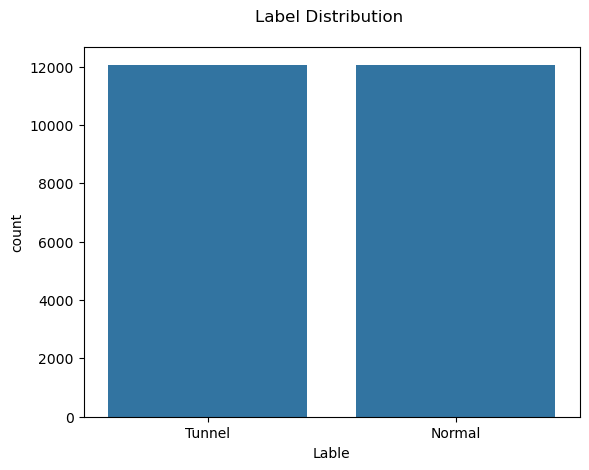

In [283]:
sns.countplot(x="Lable",data=df2)
plt.title("Label Distribution \n ")
plt.savefig("image.png")
plt.show()

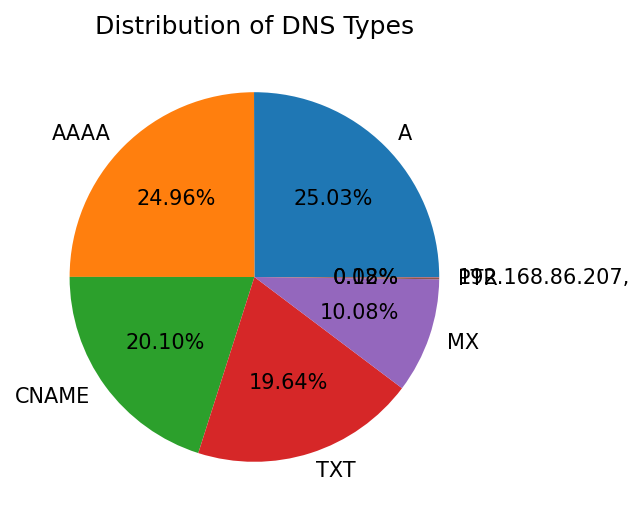

In [284]:
plt.figure(figsize=(4,4),dpi=150)
x=df2.DNS_type.value_counts()
plt.pie(x,labels=x.index,autopct="%.2f%%") #explode=(.05,.05,.05,.05,.05,.05)
plt.title("Distribution of DNS Types")
plt.savefig("image1.png")
plt.show()

In [285]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import math

In [286]:
def calculate_entropy(text):
    if not text: 
        return 0 
    entropy = 0
    for x in range(256): 
        p_x = float(text.count(chr(x)))/len(text) 
        if p_x > 0: 
            entropy += - p_x*math.log(p_x, 2) 
    return entropy

In [287]:

entropy_train_vals = []

for query in df2['DNS_info']:
    entropy = calculate_entropy(query)
    entropy_train_vals.append(entropy)
    
df2['Entropy'] = entropy_train_vals

In [288]:
df2.shape

(24124, 10)

In [289]:
df2=df2.drop(["Timestamp","Protocol","Source_IP","Destination_IP", "Identification_no"],axis=1)

In [290]:
df2.duplicated().sum()

1006

In [291]:
df2.drop_duplicates(inplace=True)

In [292]:
df2.shape

(23118, 5)

In [293]:
profile = ProfileReport(df2, title="Profiling Report")

In [294]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00,  5.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [295]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [296]:
clf = setup(df2, target = 'Lable', session_id = 123,index=False)

NameError: name 'setup' is not defined

In [ ]:
best = compare_models()

In [ ]:
evaluate_model(best)

In [ ]:
# check the final params of best model
best.get_params()

In [ ]:
best.feature_names_in_

In [ ]:
# save model
save_model(best, 'best_pipeline')

In [ ]:
pred_holdout = predict_model(best)

In [ ]:
#Load the pipeline from the .pkl file
loaded_pipeline = joblib.load('best_pipeline.pkl')

In [ ]:
# #Take input from the user
# user_input = input("Enter DNS_type, DNS_info, DNS_Response_Len separated by commas: ")
# user_data = user_input.split(',')

In [ ]:
# # Prepare user input as a DataFrame
# user_df = pd.DataFrame({
#     'DNS_type': [user_data[0].strip()],
#     'DNS_info': [user_data[1].strip()],
#     'DNS_Response_Len': [float(user_data[2].strip())],
#     'Entropy': calculate_entropy('DNS_info')
# })

In [ ]:
# # Make predictions using the loaded pipeline
# prediction = loaded_pipeline.predict(user_df)
# print("Predicted class:", prediction[0])